### Importing packages

In [994]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

### Read the Data in a Data Frame

In [995]:
df=pd.read_csv('./data/day.csv')

## Data understanding, preparation and EDA
### Look at shape, first few rows of Data

In [996]:
df.shape

(730, 16)

In [997]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Look at the Data Types, Distributions in Data

In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [999]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


### Drop Irrelevant Features

#### dteday -> since we already have yesr, month, weekday, etc. this is not required
#### instant -> unique values ofr all columns, not required
#### casual+registered = cnt, so they mey lead to target leakage. Hence removed.

In [1000]:
df = df.drop(['dteday', 'instant', 'casual', 'registered'],axis=1)


### Plotting Target Distribution

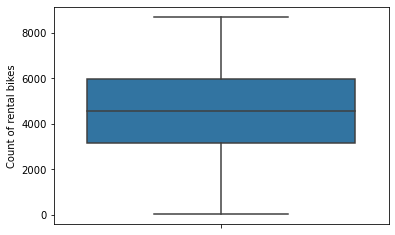

In [1001]:
sns.boxplot( y=df["cnt"] )
plt.ylabel('Count of rental bikes')
plt.show()

### Covering Incorrect Integer Features(Non Continuous) to Categorial Features 

In [1002]:
df['season'].replace({1:"SPR",2:"SUM",3:"FAL",4:"WIN"},inplace=True)
df['weathersit'].replace({1:"C",2:"M",3:"L",4:'H'},inplace=True)
df['weekday'].replace({0:"SUN",1:"MON",2:"TUE",3:"WED",4:"THU",5:"FRI",6:"SAT"},inplace=True)
df['mnth'].replace({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"},inplace=True)

In [1003]:
df.describe(include='all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730,730.000000,730,730.000000,730,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000
unique,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN
top,FAL,NaN,JAN,NaN,SAT,NaN,C,NaN,NaN,NaN,NaN,NaN
freq,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.500000,NaN,0.028767,NaN,0.683562,NaN,20.319259,23.726322,62.765175,12.763620,4508.006849
std,NaN,0.500343,NaN,0.167266,NaN,0.465405,NaN,7.506729,8.150308,14.237589,5.195841,1936.011647
min,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,22.000000
25%,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,NaN,0.500000,NaN,0.000000,NaN,1.000000,NaN,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,26.880615,30.445775,72.989575,15.625589,5966.000000


#### Pairplots for continuous Variables

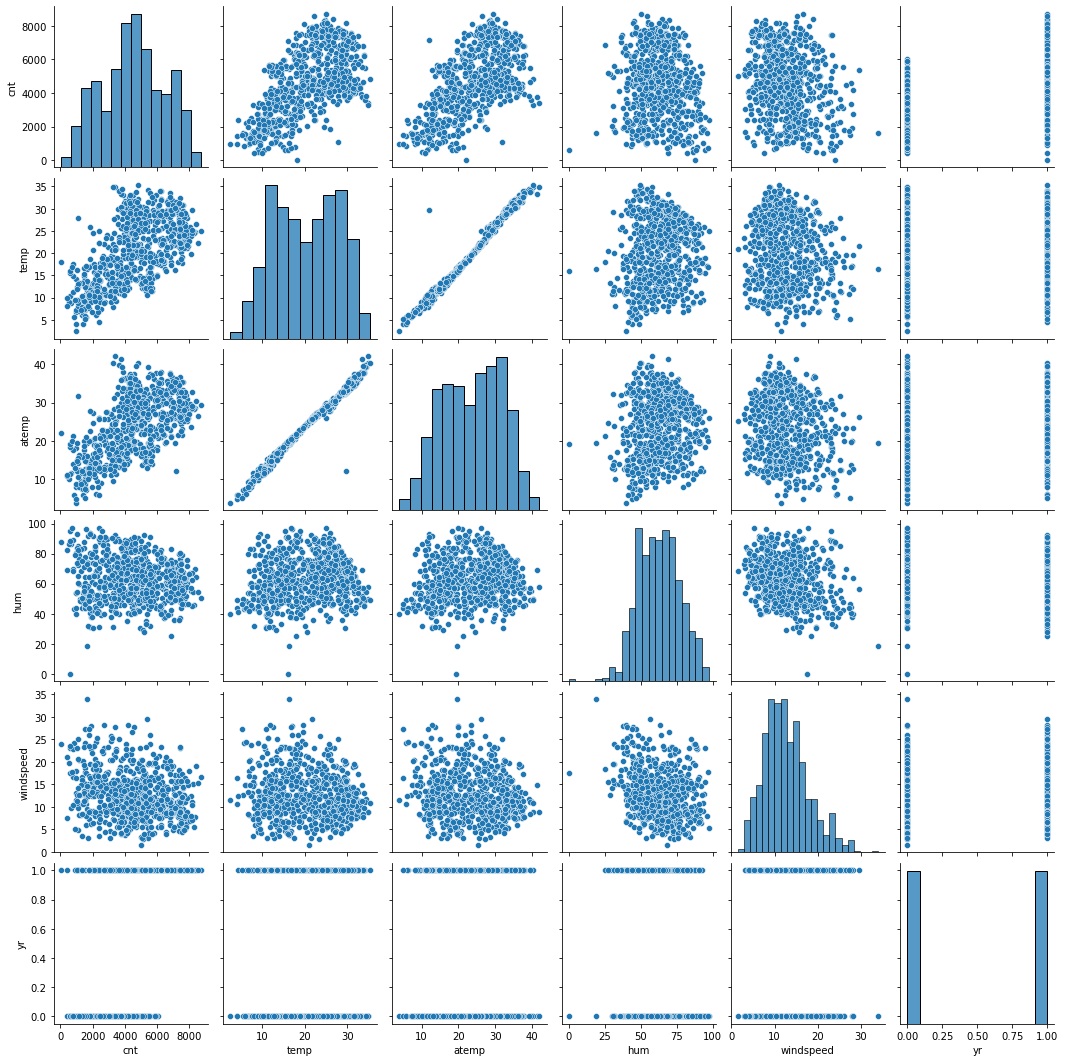

In [1004]:
vars=["cnt","temp","atemp","hum","windspeed", "yr"]
sns.pairplot(df[vars])
plt.show()

#### BoxPlots for Categorical Variables

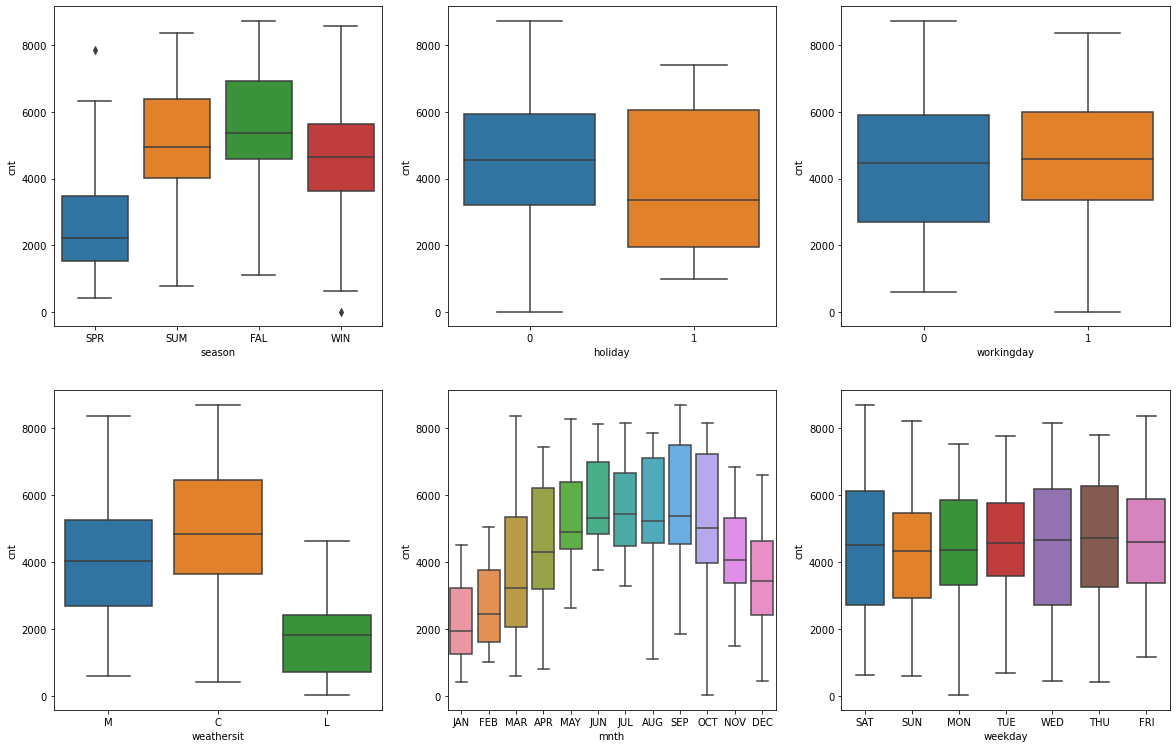

In [1005]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.show()

#### Correlation Matrix

<AxesSubplot:>

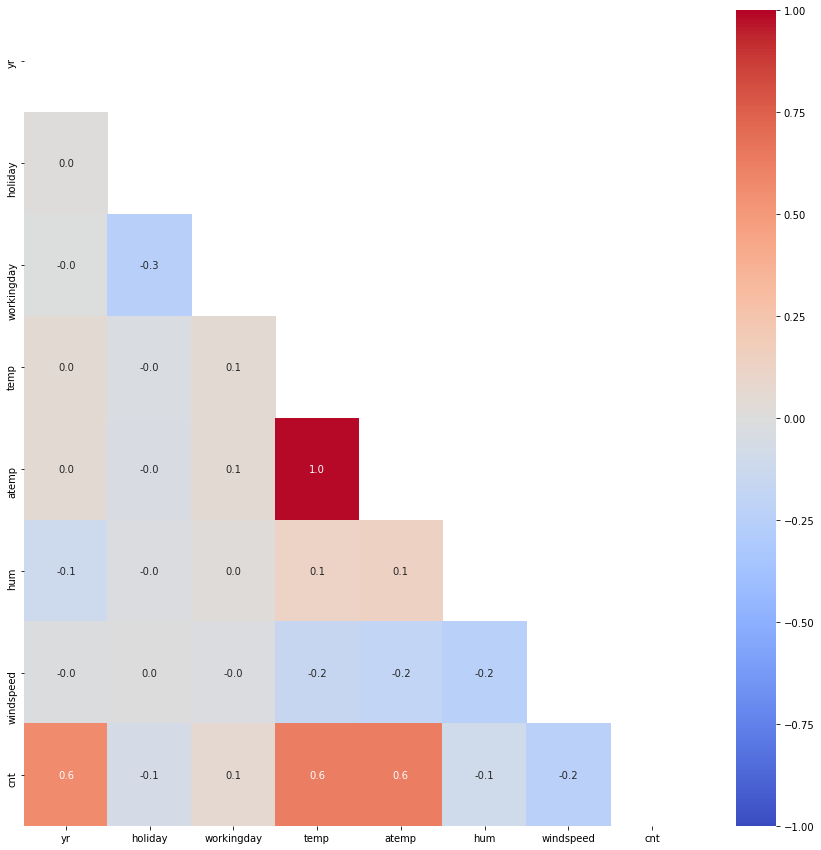

In [1006]:
# Heatmap of Correlation in raw features
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

### Since temp and a temp show a liner relationship and are higly correlated to each other, we can drop any one of them. Here, we are going to drop atemp.

In [1007]:
df.drop(['atemp'],axis=1,inplace=True)

### Histograms for Continuous Variables

array([[<AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

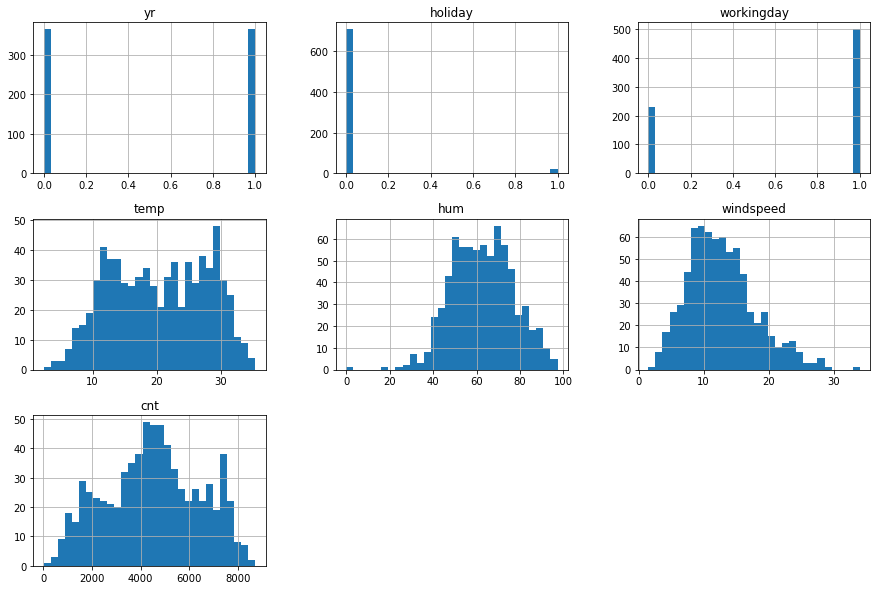

In [1008]:
df.hist(bins=30, figsize=(15, 10))

#### Create Dummy Variables for Categorical features having more than 2 values

In [1009]:
dummies = pd.get_dummies(df[["season", "weathersit", "mnth", "weekday"]], drop_first=True)
dummies.head()

,season_SPR,season_SUM,season_WIN,weathersit_L,weathersit_M,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Concatenate Dummy Variables to the Data Frame, Drop Existing Features

In [1010]:
df = pd.concat([df,dummies],axis=1)
df = df.drop(["season", "weathersit", "mnth", "weekday"],axis=1)
df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_SPR,season_SUM,season_WIN,...,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model building and evaluation
#### Test Train Split of The Data
#### Since Continuous Variales do not show Normal Distribution in histograms, We will Do a MinMax Scaler of the features.

In [1011]:
df_test, df_train = train_test_split(df, test_size=0.8, random_state=428)

cont_features=['temp','hum','windspeed']
scaler=MinMaxScaler()

df_train[cont_features] = scaler.fit_transform(df_train[cont_features])
df_test[cont_features] = scaler.transform(df_test[cont_features])

X_train=df_train.loc[:, df_train.columns != 'cnt']
y_train=df_train['cnt']

X_test=df_test.loc[:, df_test.columns != 'cnt']
y_test=df_test['cnt']

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Since temprature, year show highest correlation with count, Let's create a Single linear Regression with just Temprature, Year 

In [1012]:
X_train_temp=sm.add_constant(X_train['temp'])
lr_temp = sm.OLS(y_train, X_train_temp).fit()
lr_temp.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     361.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           4.76e-63
Time:                        18:29:46   Log-Likelihood:                -5107.8
No. Observations:                 584   AIC:                         1.022e+04
Df Residuals:                     582   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.9933    163.560     10.259      0.000    1356.754    1999.233
temp        5248.5126    276.071     19.011      0.000    4706.297    5790.729
==============================================================================
Omnibus:                       32.702   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.648
Skew:                           0.154   Prob(JB):                     0.000660
Kurtosis:                       2.288   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

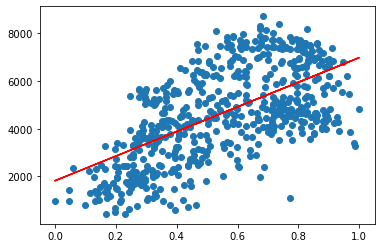

In [1013]:

plt.scatter(X_train_temp.iloc[:, 1], y_train)
plt.plot(X_train_temp.iloc[:, 1], 1821.5073 + 5158.9675*X_train_temp.iloc[:, 1], 'r')
plt.show()

In [1030]:
X_train_yr=sm.add_constant(X_train['yr'])
lr_yr = sm.OLS(y_train, X_train_yr).fit()
lr_yr.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           8.46e-56
Time:                        19:35:02   Log-Likelihood:                -5124.5
No. Observations:                 584   AIC:                         1.025e+04
Df Residuals:                     582   BIC:                         1.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3382.8776     92.720     36.485      0.000    3200.771    3564.984
yr          2281.6291    129.799     17.578      0.000    2026.697    2536.561
==============================================================================
Omnibus:                       35.601   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.096
Skew:                          -0.626   Prob(JB):                     1.96e-09
Kurtosis:                       2.720   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple linear Regression with all Features, Calulating top 20 features using RFE

In [1014]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

rfe = RFE(lr_all, 20)
rfe = rfe.fit(X_train, y_train)

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [1015]:
supported_columns=X_train.columns[rfe.support_]
supported_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_SPR',
       'season_WIN', 'weathersit_L', 'weathersit_M', 'mnth_DEC', 'mnth_FEB',
       'mnth_JAN', 'mnth_JUL', 'mnth_MAY', 'mnth_NOV', 'mnth_OCT', 'mnth_SEP',
       'weekday_SAT', 'weekday_SUN'],
      dtype='object')

In [1016]:
unsupported_columns=X_train.columns[~rfe.support_]
unsupported_columns

Index(['season_SUM', 'mnth_AUG', 'mnth_JUN', 'mnth_MAR', 'weekday_MON',
       'weekday_THU', 'weekday_TUE', 'weekday_WED'],
      dtype='object')

### Creating a Multiple Linear Regression Model with features under top 20 (Supported)

In [1017]:
X_train_s1 = sm.add_constant(X_train[supported_columns])
lr_supported = sm.OLS(y_train, X_train_s1).fit()
lr_supported.summary()


/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.93e-221
Time:                        18:29:46   Log-Likelihood:                -4687.3
No. Observations:                 584   AIC:                             9415.
Df Residuals:                     564   BIC:                             9502.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2274.1805    182.768     12.443      0.000    1915.191    2633.170
yr            2086.4693     63.714     32.747      0.000    1961.323    2211.616
holiday         88.0626    166.478      0.529      0.597    -238.931     415.056
workingday     814.8422     71.834     11.343      0.000     673.747     955.937
temp          3463.1483    262.672     13.184      0.000    2947.213    3979.084
hum          -1285.4943    261.860     -4.909      0.000   -1799.834    -771.155
windspeed    -1220.7834    206.486     -5.912      0.000   -1626.360    -815.207
season_SPR    -732.8596    147.559     -4.967      0.000   -1022.691    -443.028
season_WIN     709.4675    179.092      3.961      0.000     357.700    1061.235
weathersit_L -1677.4810    217.881     -7.699      0.000   -2105.438   -1249.524
weathersit_M  -465.3176     86.841     -5.358      0.000    -635.890    -294.746
mnth_DEC      -560.8119    183.673     -3.053      0.002    -921.578    -200.045
mnth_FEB      -431.6681    179.478     -2.405      0.016    -784.194     -79.142
mnth_JAN      -619.9135    174.650     -3.549      0.000    -962.958    -276.869
mnth_JUL      -416.5540    131.402     -3.170      0.002    -674.651    -158.458
mnth_MAY       303.9125    124.798      2.435      0.015      58.787     549.038
mnth_NOV      -536.4483    215.167     -2.493      0.013    -959.076    -113.821
mnth_OCT       189.4396    209.550      0.904      0.366    -222.155     601.034
mnth_SEP       501.8717    133.881      3.749      0.000     238.906     764.837
weekday_SAT    882.5969     88.275      9.998      0.000     709.209    1055.984
weekday_SUN    488.6788     89.944      5.433      0.000     312.013     665.345
==============================================================================
Omnibus:                      104.639   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.436
Skew:                          -0.890   Prob(JB):                     4.67e-62
Kurtosis:                       5.905   Cond. No.                     6.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Calculating Variance Inference Score for supported features

In [1018]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[supported_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[supported_columns].values, i) for i in range(X_train[supported_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,35.7
18,weekday_SAT,8.5
19,weekday_SUN,8.0
7,season_WIN,6.2
6,season_SPR,4.0
3,temp,3.7
15,mnth_NOV,3.5
16,mnth_OCT,3.5
10,mnth_DEC,2.9
12,mnth_JAN,2.5


### Since Working Day has high VIF, we will drop workingday from supported features and create a new model

In [1019]:
supported_columns = supported_columns.drop(['workingday'])
X_train_s2 = sm.add_constant(X_train[supported_columns])
lr_s2 = sm.OLS(y_train, X_train_s2).fit()
lr_s2.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.93e-221
Time:                        18:29:47   Log-Likelihood:                -4687.3
No. Observations:                 584   AIC:                             9415.
Df Residuals:                     564   BIC:                             9502.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3089.0227    225.871     13.676      0.000    2645.371    3532.675
yr            2086.4693     63.714     32.747      0.000    1961.323    2211.616
holiday       -726.7796    201.598     -3.605      0.000   -1122.754    -330.805
temp          3463.1483    262.672     13.184      0.000    2947.213    3979.084
hum          -1285.4943    261.860     -4.909      0.000   -1799.834    -771.155
windspeed    -1220.7834    206.486     -5.912      0.000   -1626.360    -815.207
season_SPR    -732.8596    147.559     -4.967      0.000   -1022.691    -443.028
season_WIN     709.4675    179.092      3.961      0.000     357.700    1061.235
weathersit_L -1677.4810    217.881     -7.699      0.000   -2105.438   -1249.524
weathersit_M  -465.3176     86.841     -5.358      0.000    -635.890    -294.746
mnth_DEC      -560.8119    183.673     -3.053      0.002    -921.578    -200.045
mnth_FEB      -431.6681    179.478     -2.405      0.016    -784.194     -79.142
mnth_JAN      -619.9135    174.650     -3.549      0.000    -962.958    -276.869
mnth_JUL      -416.5540    131.402     -3.170      0.002    -674.651    -158.458
mnth_MAY       303.9125    124.798      2.435      0.015      58.787     549.038
mnth_NOV      -536.4483    215.167     -2.493      0.013    -959.076    -113.821
mnth_OCT       189.4396    209.550      0.904      0.366    -222.155     601.034
mnth_SEP       501.8717    133.881      3.749      0.000     238.906     764.837
weekday_SAT     67.7547     88.736      0.764      0.445    -106.538     242.047
weekday_SUN   -326.1634     91.809     -3.553      0.000    -506.492    -145.835
==============================================================================
Omnibus:                      104.639   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.436
Skew:                          -0.890   Prob(JB):                     4.67e-62
Kurtosis:                       5.905   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1020]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[supported_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[supported_columns].values, i) for i in range(X_train[supported_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.0
2,temp,14.3
6,season_WIN,8.1
5,season_SPR,4.8
4,windspeed,4.2
15,mnth_OCT,3.8
14,mnth_NOV,3.7
9,mnth_DEC,3.0
11,mnth_JAN,2.6
8,weathersit_M,2.5


### Since humidity has high VIF, we will drop humidity from supported features and create a new model

In [1021]:
supported_columns = supported_columns.drop(['hum'])
X_train_s3 = sm.add_constant(X_train[supported_columns])
lr_s3 = sm.OLS(y_train, X_train_s3).fit()
lr_s3.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.60e-217
Time:                        18:29:47   Log-Likelihood:                -4699.5
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     565   BIC:                             9520.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2593.2473    206.125     12.581      0.000    2188.383    2998.112
yr            2135.8868     64.187     33.276      0.000    2009.812    2261.961
holiday       -713.1774    205.658     -3.468      0.001   -1117.125    -309.230
temp          3151.1320    260.025     12.119      0.000    2640.399    3661.865
windspeed     -948.4982    202.923     -4.674      0.000   -1347.073    -549.923
season_SPR    -793.0663    150.024     -5.286      0.000   -1087.739    -498.393
season_WIN     673.7415    182.565      3.690      0.000     315.153    1032.330
weathersit_L -2224.4737    191.023    -11.645      0.000   -2599.676   -1849.272
weathersit_M  -729.2359     69.580    -10.481      0.000    -865.902    -592.570
mnth_DEC      -688.0671    185.514     -3.709      0.000   -1052.449    -323.685
mnth_FEB      -419.9691    183.094     -2.294      0.022    -779.596     -60.342
mnth_JAN      -663.7230    177.952     -3.730      0.000   -1013.251    -314.195
mnth_JUL      -367.6586    133.675     -2.750      0.006    -630.220    -105.098
mnth_MAY       191.0322    125.144      1.527      0.127     -54.771     436.836
mnth_NOV      -613.7117    218.934     -2.803      0.005   -1043.735    -183.688
mnth_OCT        98.7915    212.959      0.464      0.643    -319.497     517.080
mnth_SEP       397.8651    134.869      2.950      0.003     132.960     662.771
weekday_SAT     72.6748     90.526      0.803      0.422    -105.133     250.483
weekday_SUN   -351.1360     93.523     -3.755      0.000    -534.830    -167.442
==============================================================================
Omnibus:                      103.857   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.882
Skew:                          -0.876   Prob(JB):                     5.06e-63
Kurtosis:                       5.953   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1022]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[supported_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[supported_columns].values, i) for i in range(X_train[supported_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_WIN,8.0
2,temp,5.5
4,season_SPR,4.5
3,windspeed,4.2
14,mnth_OCT,3.7
13,mnth_NOV,3.6
8,mnth_DEC,2.9
10,mnth_JAN,2.5
0,yr,2.1
9,mnth_FEB,2.1


### Since Winter Season has high VIF, we will drop Winter Season from supported features and create a new model

In [1023]:
supported_columns = supported_columns.drop(['season_WIN'])
X_train_s4 = sm.add_constant(X_train[supported_columns])
lr_s4 = sm.OLS(y_train, X_train_s4).fit()
lr_s4.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.73e-215
Time:                        18:29:48   Log-Likelihood:                -4706.4
No. Observations:                 584   AIC:                             9449.
Df Residuals:                     566   BIC:                             9528.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2740.5500    204.465     13.403      0.000    2338.947    3142.153
yr            2141.7805     64.879     33.012      0.000    2014.348    2269.213
holiday       -739.0647    207.817     -3.556      0.000   -1147.252    -330.878
temp          2995.7566    259.438     11.547      0.000    2486.178    3505.335
windspeed     -992.6804    204.815     -4.847      0.000   -1394.970    -590.390
season_SPR   -1028.6072    137.275     -7.493      0.000   -1298.239    -758.976
weathersit_L -2253.8915    192.973    -11.680      0.000   -2632.921   -1874.862
weathersit_M  -724.2822     70.338    -10.297      0.000    -862.437    -586.127
mnth_DEC      -238.1766    141.386     -1.685      0.093    -515.882      39.529
mnth_FEB      -268.0355    180.383     -1.486      0.138    -622.337      86.266
mnth_JAN      -525.8510    175.915     -2.989      0.003    -871.377    -180.325
mnth_JUL      -368.5239    135.157     -2.727      0.007    -633.994    -103.053
mnth_MAY       160.0489    126.246      1.268      0.205     -87.919     408.016
mnth_NOV       -12.4119    147.854     -0.084      0.933    -302.822     277.998
mnth_OCT       722.2146    131.107      5.509      0.000     464.698     979.731
mnth_SEP       574.2714    127.512      4.504      0.000     323.817     824.725
weekday_SAT     57.5452     91.435      0.629      0.529    -122.049     237.139
weekday_SUN   -351.9635     94.559     -3.722      0.000    -537.693    -166.234
==============================================================================
Omnibus:                      106.577   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.957
Skew:                          -0.903   Prob(JB):                     1.09e-63
Kurtosis:                       5.941   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1024]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[supported_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[supported_columns].values, i) for i in range(X_train[supported_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.5
3,windspeed,4.2
4,season_SPR,3.8
9,mnth_JAN,2.3
0,yr,2.1
8,mnth_FEB,2.0
6,weathersit_M,1.5
10,mnth_JUL,1.5
11,mnth_MAY,1.3
14,mnth_SEP,1.3


### Since VIFs look fine, We will drop features such as mnth_FEB, mnth_NOV, mnth_MAY, weekday_SAT, mnth_DEC because of high p scores.

In [1025]:
supported_columns = supported_columns.drop(['mnth_FEB', 'mnth_NOV', 'mnth_MAY', 'weekday_SAT', 'mnth_DEC'])
X_train_s5 = sm.add_constant(X_train[supported_columns])
lr_s5 = sm.OLS(y_train, X_train_s5).fit()
lr_s5.summary()

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     253.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.58e-220
Time:                        18:29:48   Log-Likelihood:                -4709.9
No. Observations:                 584   AIC:                             9446.
Df Residuals:                     571   BIC:                             9503.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2592.0253    152.518     16.995      0.000    2292.460    2891.591
yr            2136.5551     64.814     32.965      0.000    2009.253    2263.857
holiday       -747.0189    205.790     -3.630      0.000   -1151.216    -342.822
temp          3226.4671    207.184     15.573      0.000    2819.532    3633.403
windspeed     -926.8935    201.576     -4.598      0.000   -1322.815    -530.972
season_SPR   -1138.2625    108.398    -10.501      0.000   -1351.170    -925.355
weathersit_L -2272.1557    192.838    -11.783      0.000   -2650.914   -1893.397
weathersit_M  -720.3395     70.076    -10.279      0.000    -857.978    -582.701
mnth_JAN      -331.0287    139.312     -2.376      0.018    -604.655     -57.402
mnth_JUL      -423.6598    131.548     -3.221      0.001    -682.037    -165.283
mnth_OCT       742.3386    121.215      6.124      0.000     504.256     980.421
mnth_SEP       557.1922    123.115      4.526      0.000     315.379     799.005
weekday_SUN   -360.4984     93.129     -3.871      0.000    -543.416    -177.581
==============================================================================
Omnibus:                       97.372   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.836
Skew:                          -0.832   Prob(JB):                     1.39e-57
Kurtosis:                       5.827   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1026]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[supported_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[supported_columns].values, i) for i in range(X_train[supported_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 1)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.0
3,windspeed,4.1
4,season_SPR,2.1
0,yr,2.0
7,mnth_JAN,1.6
6,weathersit_M,1.5
8,mnth_JUL,1.4
10,mnth_SEP,1.2
11,weekday_SUN,1.2
5,weathersit_L,1.1


### Now Our Model Looks fine in terms of VIF, p score, and R Score. We will Go ahead With Plotting Residual Plots for Training and test Datasets.

#### Multi Linear Regression Equation -

##### Count = 2592.0253	+ 2136.5551 * yr - 747.0189 * holiday + 3226.4671 * temp - 926.8935 * windspeed - 1138.2625 * season_SPR - 2272.1557 * weathersit_L - 720.3395 * weathersit_M - 331.0287 * mnth_JAN - 423.6598 * mnth_JUL + 742.3386 * mnth_OCT + 557.1922 * mnth_SEP - 360.4984 * weekday_SUN	

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residual')

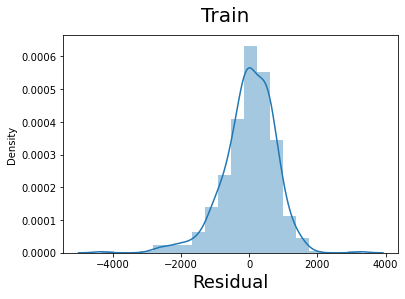

In [1027]:
fig = plt.figure()
y_train_pred = lr_s5.predict(X_train_s5)
res = y_train - y_train_pred
sns.distplot((res), bins = 20)
fig.suptitle('Train', fontsize = 20)
plt.xlabel('Residual', fontsize = 18)     

/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/kunal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residual')

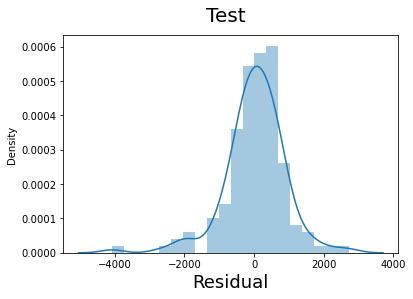

In [1028]:
fig = plt.figure()
X_test_s = sm.add_constant(X_test[supported_columns])
y_test_pred = lr_s5.predict(X_test_s)
res = y_test - y_test_pred
sns.distplot((res), bins = 20)
fig.suptitle('Test', fontsize = 20)
plt.xlabel('Residual', fontsize = 18)     

### Comparing Evaluation Metrics for Train Vs Test. 
#### Train Accuracies are slightly higher compared to test but the drift is not too much.

In [1029]:
training_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
training_r_squared = r2_score(y_train, y_train_pred)
test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r_squared = r2_score(y_test, y_test_pred)

print('Training MSE : - ' + str(training_mse))
print('Training RSQ : - ' + str(training_r_squared))

print('Training MSE : - ' + str(test_mse))
print('Training RSQ : - ' + str(test_r_squared))

Training MSE : - 769.6039621262493
Training RSQ : - 0.8421080503706064
Training MSE : - 864.3133269615174
Training RSQ : - 0.7969710937519857
